In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
plt.style.use('classic')
from matplotlib.backends.backend_pdf import PdfPages

% matplotlib inline
%load_ext autoreload
% autoreload

In [13]:
data_naspm = pd.read_pickle('/data/ana_naspm_low_con')
pre_LTD50 = pd.read_pickle('/data/ana_pre_50Hz_reci')

In [14]:
data_naspm

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
189,"{'ave_all': [[3.78654678517e-12, 3.95694381498...","{'ave_all': [[7.59328954124e-13, 6.10296778635...",2018060501,24,NaN,NaN
190,"{'ave_all': [[7.48499964948e-13, 7.76802151931...","{'ave_all': [[1.42901794141e-12, 1.25181038722...",2018060502,15,NaN,NaN
191,"{'ave_all': [[1.56154376004e-12, 1.39848270233...","{'ave_all': [[1.92610625627e-13, 6.42109397164...",2018060601,23,NaN,NaN
192,"{'ave_all': [[7.03383737572e-12, 6.77529696441...","{'ave_all': [[1.81344049903e-12, 1.67757140527...",2018060602,17,NaN,NaN
193,"{'ave_all': [[1.5547425873e-12, 1.33511309557e...","{'ave_all': [[3.11784263288e-12, 2.83989669946...",2018060603,17,NaN,NaN
194,"{'ave_all': [[1.68715251424e-12, 1.59761233341...","{'ave_all': [[1.56721778253e-12, 1.52243693683...",2017092802,21,NaN,NaN


/src/Patch_ana/Patch_ana/patch_pip.py:489: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

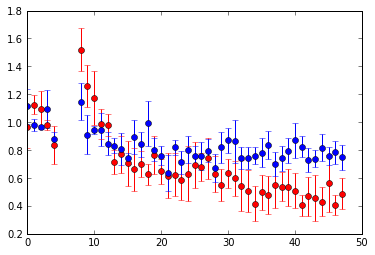

In [15]:
ave_ptl_resp = np.ones((len(pre_LTD50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50, ave_ptl_50 = patch_pip.samp_ave(pre_LTD50, ave_ptl_resp)
ave_ptl_mean_50 = ave_ptl_mean_50[:-12]
ave_ptl_ste_50 = ave_ptl_ste_50[:-12]
ave_ptl_50 = ave_ptl_50[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

ave_ptl_resp = np.ones((len(data_naspm), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2,ave_ptl_2  = patch_pip.samp_ave(data_naspm, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

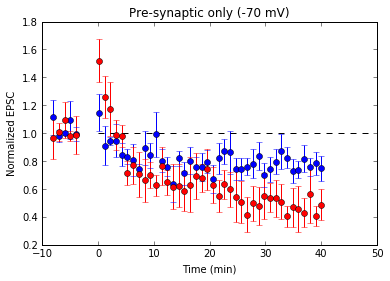

In [16]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(pre_LTD2)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_50cp)- 6 * 4/3, len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(pre_LTD50)))

plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.ylim([0.2, 1.8])
plt.title('Pre-synaptic only (-70 mV)')

with PdfPages('/data/Figure3_3.pdf') as pdf:
    pdf.savefig()

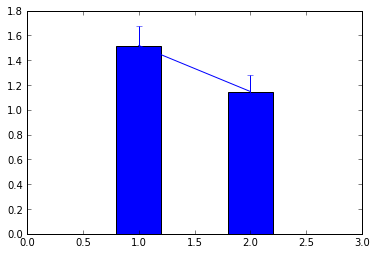

In [20]:
# Compare post tetanic potentiation
PTP_50Hz_mean = ave_ptl_mean_50cp[8]
PTP_50Hz_ste = ave_ptl_ste_50cp[8]

PTP_50Hz_mean_naspm = ave_ptl_mean_2cp[8]
PTP_50Hz_ste_naspm = ave_ptl_ste_2cp[8]

plt.bar([1,2], [PTP_50Hz_mean, PTP_50Hz_mean_naspm], align='center', width=0.4)
plt.errorbar(x=[1,2], y=[PTP_50Hz_mean, PTP_50Hz_mean_naspm],yerr = [PTP_50Hz_ste, PTP_50Hz_ste_naspm], fmt='')
plt.xlim([0,3])
with PdfPages('/data/Figure3_6.pdf') as pdf:
    pdf.savefig()

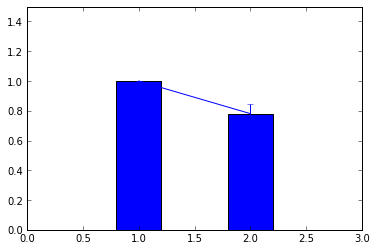

In [30]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2], [1, mean_amp_aft_2Hz], align='center', width=0.4)
plt.errorbar(x=[1,2], y=[1, mean_amp_aft_2Hz],yerr = [0, std_amp_aft_2Hz], fmt='')
plt.ylim([0,1.5])
plt.xlim([0,3])
with PdfPages('/data/Figure2_8.pdf') as pdf:
    pdf.savefig()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


(0, 3)

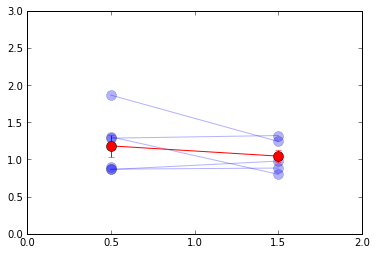

In [9]:
# Compare PPR
mean_PPR_bef = [np.nanmean(data_naspm['Before'].loc[i]['PPR']) for i in data_naspm['Before'].index]
mean_PPR_aft = [np.nanmean(data_naspm['After'].loc[i]['PPR'][-10:]) for i in data_naspm['After'].index]

mean_PPR_ave_bef = np.nanmean(mean_PPR_bef)
mean_PPR_std_bef = np.nanstd(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.nanmean(mean_PPR_aft)
mean_PPR_std_aft = np.nanstd(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
# with PdfPages('/data/Supp2_1.pdf') as pdf:
#     pdf.savefig()

In [9]:
data_naspm['Before'].index

Int64Index([127, 128, 129, 130, 132], dtype='int64')

In [10]:
data_naspm['Before'].loc[127].keys()

dict_keys(['onset_tau', 'ave_amp1', 'ave_all', 'raw_amp2', 'resp1_region', 'failure', 'rs', 'x', 'resp2_region', 'raw_amp1', 'decay_tau', 'ave_amp2', 'trace_y1', 'PPR', 'ir', 'trace_y2'])

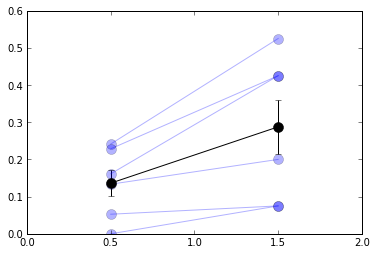

In [31]:
# Compare failure rate
mean_fail_bef = [np.sum(data_naspm['Before'].loc[i]['failure'])/len(data_naspm['Before'].loc[i]['failure']) for i in data_naspm['Before'].index]
mean_fail_aft = [np.sum(data_naspm['After'].loc[i]['failure'][-40:])/40 for i in data_naspm['After'].index]

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
#plt.ylim([-0.05,0.15])

with PdfPages('/data/Figure2_9.pdf') as pdf:
    pdf.savefig()

/src/Patch_ana/Patch_ana/patch_pip.py:467: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


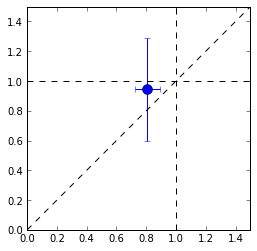

In [23]:
# CV analysis
r_50, pi_50 = patch_pip.cv_analysis(data_naspm, bef_len=15, aft_len=100)
r_50.pop(1)
r_50.pop(2)
pi_50.pop(1)
pi_50.pop(2)

plt.errorbar(np.mean(pi_50), np.mean(r_50), np.std(r_50)/np.sqrt(len(r_50)), np.std(pi_50)/np.sqrt(len(pi_50)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')

In [21]:
data_naspm['Before'].index

Int64Index([189, 190, 191, 192, 193, 194], dtype='int64')

In [14]:
data_naspm['Before'].loc[128]['raw_amp1'].shape

(52,)

In [15]:
np.nanstd(data_naspm['After'].loc[130]['raw_amp1'][-80:])

1.0284540768976933e-11

In [16]:
test = data_naspm['After'].loc[130]['raw_amp1']
test = test[~np.isnan(test)]

In [17]:
from scipy import stats

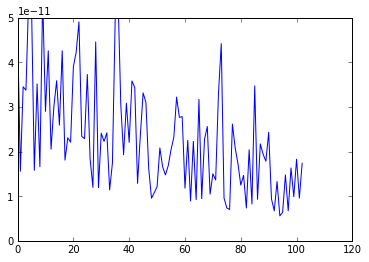

In [18]:
plt.plot(test)

(array([ 18.,  14.,  17.,  19.,   7.,  12.,   4.,   5.,   2.,   5.]),
 array([  5.57197083e-12,   1.05116598e-11,   1.54513487e-11,
          2.03910377e-11,   2.53307267e-11,   3.02704156e-11,
          3.52101046e-11,   4.01497936e-11,   4.50894825e-11,
          5.00291715e-11,   5.49688604e-11]),
 <a list of 10 Patch objects>)

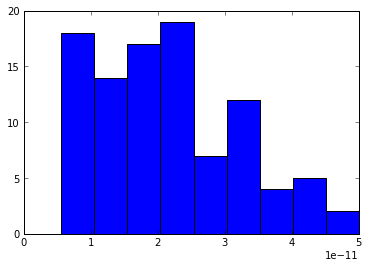

In [19]:
plt.hist(test)

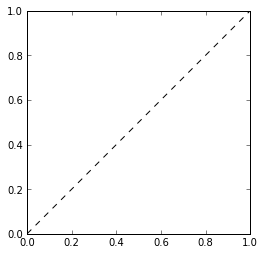

In [14]:
# CV analysis
cv_mean_bef = [np.nanmean(data_naspm['Before'].loc[i]['raw_amp1'][-40:]) for i in data_naspm['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_2[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_2.shape[0])]
               
cv_std_bef = [np.nanstd(data_naspm['Before'].loc[i]['raw_amp1'][-40:]) for i in data_naspm['Before'].index]
cv_std_aft = [np.nanstd(data_naspm['After'].loc[i]['raw_amp1'][-50:]) for i in data_naspm['After'].index]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]

plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

# # CV analysis
# cv_mean_bef = [np.nanmean(pre_hypo['Before'].loc[i]['raw_amp1'][-40:]) for i in pre_hypo['Before'].index]
# cv_mean_aft = [np.nanmean(ave_ptl_50[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_50.shape[0])]

# cv_std_bef = [np.nanstd(pre_hypo['Before'].loc[i]['raw_amp1'][-40:]) for i in pre_hypo['Before'].index]
# cv_std_aft = [np.nanstd(pre_hypo['After'].loc[i]['raw_amp1'][-50:]) for i in pre_hypo['After'].index]

# r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
# pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]

# plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)), 'o', markersize=10)
plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.axes().set_aspect('equal')
# with PdfPages('/data/Figure1A_14.pdf') as pdf:
#     pdf.savefig()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:26: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

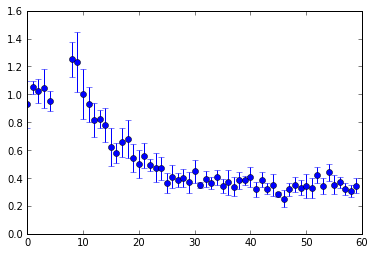

In [21]:
data = data_naspm
ave_ptl_resp = np.ones((len(data), 60))*np.nan

for i in range(len(data)):
    bef_resp = data.iloc[i]['Before']['ave_amp1'][-5:]
    bef_rs = np.nanmean(data.iloc[i]['Before']['rs'][-5:])
    aft_rs = np.nanmean(data.iloc[i]['After']['rs'][:(data.iloc[i]['elimi']-7)][-5:])
    aft_resp = data.iloc[i]['After']['ave_amp1'][:(data.iloc[i]['elimi']-7)]*aft_rs/bef_rs
    bef_mean = np.nanmean(bef_resp)
    if aft_resp.shape[0] < 52:
        length_fill = 52 - aft_resp.shape[0]
        mean_fill = np.nanmean(aft_resp[-5:])
        ste_fill =  np.nanstd(aft_resp[-5:])
        np.random.seed(i)
        aft_fill = np.random.normal(loc=mean_fill, scale=ste_fill, size=(1,length_fill))  
        aft_resp = np.concatenate((aft_resp, aft_fill.reshape(-1,1)))
    
    bef_resp = bef_resp/bef_mean
    aft_resp = aft_resp/bef_mean
    resp1_joint= np.concatenate([bef_resp, np.ones((3,1))*np.nan, aft_resp])
    ave_ptl_resp[i,:5] = bef_resp.reshape(1,-1)
    ave_ptl_resp[i,8:] = aft_resp[-52:].reshape(1,-1)
#   plt.figure()
#   plt.plot(resp1_joint, 'o', label='Resp 1')

ave_ptl_mean_2 = np.nanmean(ave_ptl_resp, axis=0)
ave_ptl_ste_2 = np.nanstd(ave_ptl_resp, axis=0)/np.sqrt(i)
plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')


In [22]:
# Perform processing on before amplitude
def pro_bef(data_mean, data_ste, scale=0.1):
    for i in range(len(data_mean)):
        if data_mean[i]+data_ste[i]<1:
            data_mean[i] = 1 - scale*data_ste[i]
        elif data_mean[i]-data_ste[i]>1:
            data_mean[i] = 1 + scale*data_ste[i]
            
    return data_mean, data_ste

In [23]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
ave_ptl_mean, ave_ptl_ste = pro_bef(ave_ptl_mean_2cp[8:12], ave_ptl_ste_2cp[8:12]/1.5, scale=0.5)
ave_ptl_mean_2cp[8:12], ave_ptl_ste_2cp[8:12] = ave_ptl_mean, ave_ptl_ste
ave_ptl_mean_2cp[5:57], ave_ptl_ste_2cp[5:57] = ave_ptl_mean_2cp[8:60], ave_ptl_ste_2cp[8:60]

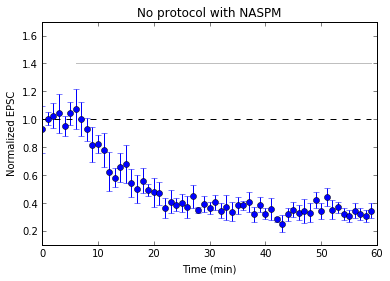

In [24]:
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='(n={a})'.format(a=len(data)))
plt.plot(np.arange(6,60), np.ones((len(np.arange(6,60)))) * 1.4, 'grey', alpha=0.5)
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.title('No protocol with NASPM')
plt.axis([0,60,0.1,1.7])

with PdfPages('/data/Figure2_1.pdf') as pdf:
    pdf.savefig()